In [2]:
from pyspark.sql import SparkSession
from pyspark import StorageLevel

spark = SparkSession.builder \
    .appName("Weather Analysis RDD") \
    .getOrCreate()
sc = spark.sparkContext
raw_rdd = sc.textFile("US_Accidents_March23.csv")
header = raw_rdd.first()
data_rdd = raw_rdd.filter(lambda line: line != header)
parsed_rdd = data_rdd.map(lambda line: line.split(","))

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
26/02/22 22:13:00 WARN Utils: Your hostname, lw-mac.local, resolves to a loopback address: 127.0.0.1; using 172.18.132.212 instead (on interface en0)
26/02/22 22:13:00 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
26/02/22 22:13:01 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [6]:
import matplotlib.pyplot as plt

header_list = header.split(",")

def get_column_processor(idx):
    def process_partition(iterator):
        for row in iterator:
            try:
                val = row[idx]
                if val and val.strip():
                    yield float(val)
            except (ValueError, IndexError):
                continue
    return process_partition

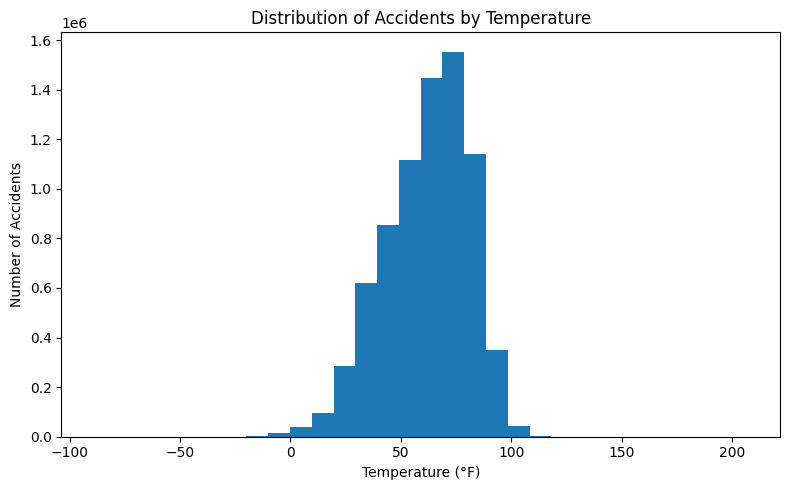

In [4]:
temp_idx = header_list.index("Temperature(F)")
temp_rdd = parsed_rdd.mapPartitions(get_column_processor(temp_idx))
bin_edges, bin_counts = temp_rdd.histogram(30)
width = bin_edges[1] - bin_edges[0]

plt.figure(figsize=(8, 5))
plt.bar(
    bin_edges[:-1],    
    bin_counts,        
    width=width,   
    align='edge'
)

plt.xlabel('Temperature (°F)')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Accidents by Temperature')
plt.tight_layout()
plt.show()

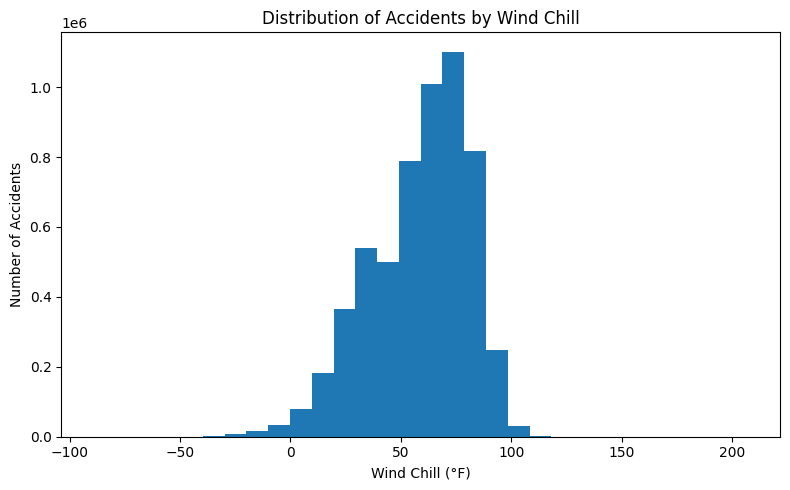

In [6]:
wind_idx = header_list.index("Wind_Chill(F)")
wind_rdd = parsed_rdd.mapPartitions(get_column_processor(wind_idx))
bin_edges, bin_counts = wind_rdd.histogram(30)
width = bin_edges[1] - bin_edges[0]

plt.figure(figsize=(8, 5))
plt.bar(
    bin_edges[:-1],    
    bin_counts,        
    width=width,   
    align='edge'
)

plt.xlabel('Wind Chill (°F)')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Accidents by Wind Chill')
plt.tight_layout()
plt.show()

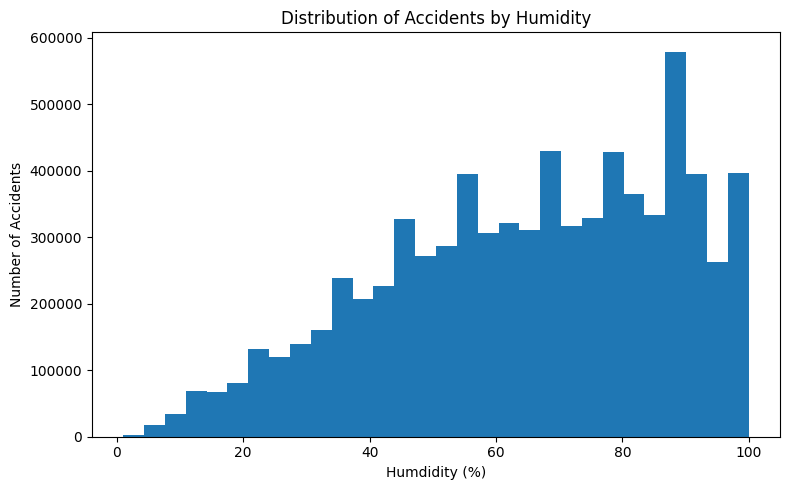

In [8]:
humidity_idx = header_list.index("Humidity(%)")
humidity_rdd = parsed_rdd.mapPartitions(get_column_processor(humidity_idx))
bin_edges, bin_counts = humidity_rdd.histogram(30)
width = bin_edges[1] - bin_edges[0]

plt.figure(figsize=(8, 5))
plt.bar(
    bin_edges[:-1],    
    bin_counts,        
    width=width,   
    align='edge'
)

plt.xlabel('Humdidity (%)')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Accidents by Humidity')
plt.tight_layout()
plt.show()

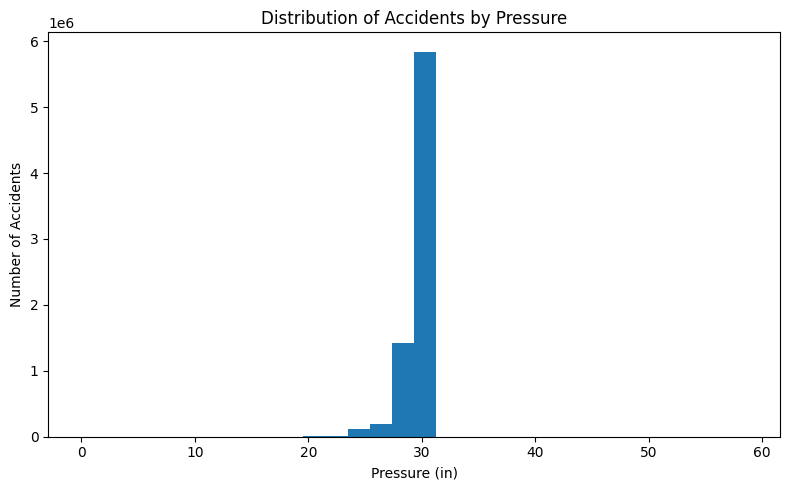

In [9]:
pressure_idx = header_list.index("Pressure(in)")
pressure_rdd = parsed_rdd.mapPartitions(get_column_processor(pressure_idx))
bin_edges, bin_counts = pressure_rdd.histogram(30)
width = bin_edges[1] - bin_edges[0]

plt.figure(figsize=(8, 5))
plt.bar(
    bin_edges[:-1],    
    bin_counts,        
    width=width,   
    align='edge'
)

plt.xlabel('Pressure (in)')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Accidents by Pressure')
plt.tight_layout()
plt.show()

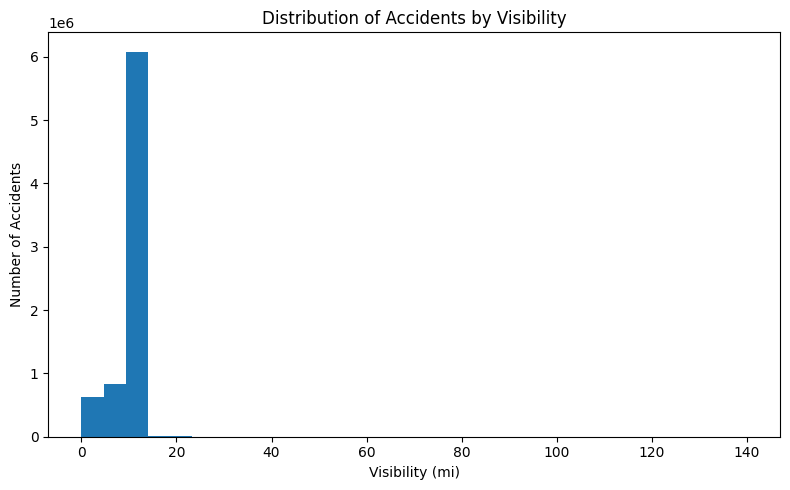

In [10]:
visibility_idx = header_list.index("Visibility(mi)")
visibility_rdd = parsed_rdd.mapPartitions(get_column_processor(visibility_idx))
bin_edges, bin_counts = visibility_rdd.histogram(30)
width = bin_edges[1] - bin_edges[0]

plt.figure(figsize=(8, 5))
plt.bar(
    bin_edges[:-1],    
    bin_counts,        
    width=width,   
    align='edge'
)

plt.xlabel('Visibility (mi)')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Accidents by Visibility')
plt.tight_layout()
plt.show()

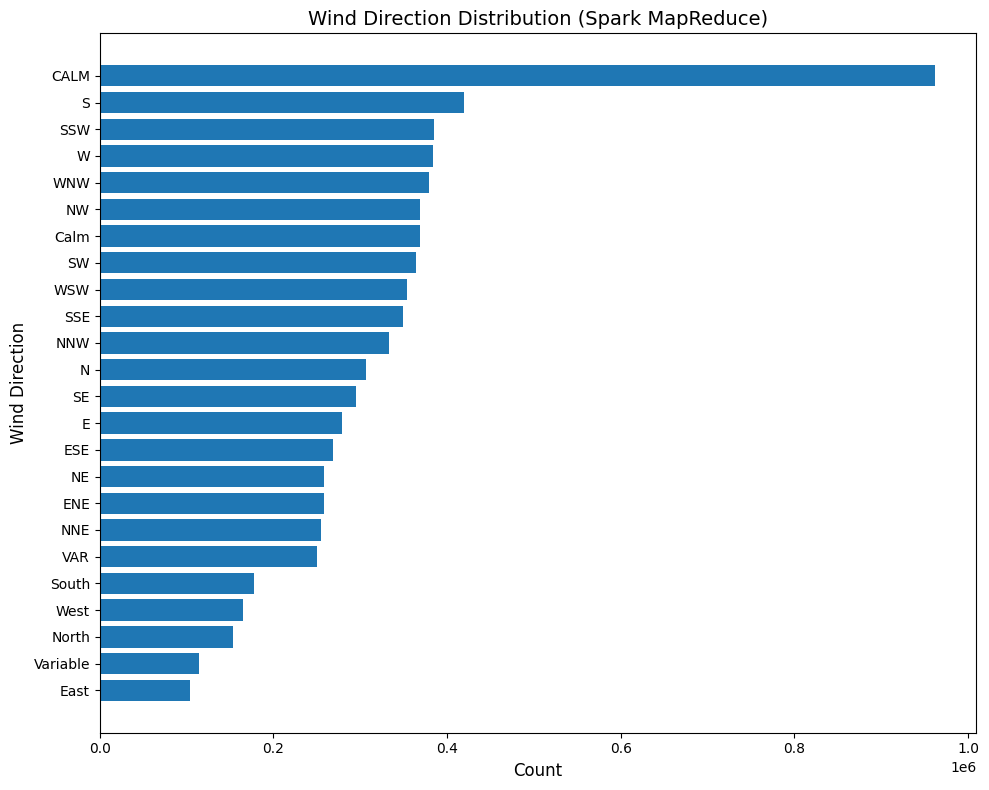

In [17]:
wind_dir_idx = header_list.index("Wind_Direction")

def get_wind_dir(iterator):
    for row in iterator:
        try:
            val = row[wind_dir_idx]
            if val and val.strip():
                yield (val.strip(), 1)
        except (IndexError, AttributeError):
            continue

wind_direction_counts = (
    parsed_rdd
    .mapPartitions(get_wind_dir)
    .reduceByKey(lambda a, b: a + b)
)

sorted_results = (
    wind_direction_counts
    .sortBy(lambda x: x[1], ascending=True) 
    .collect()
)

# Unpack the list of tuples [('South', 500), ('North', 700), ...]
labels, counts = zip(*sorted_results)
plt.figure(figsize=(10, 8))
plt.barh(labels, counts)
plt.title('Wind Direction Distribution (Spark MapReduce)', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Wind Direction', fontsize=12)
plt.tight_layout()
plt.show()

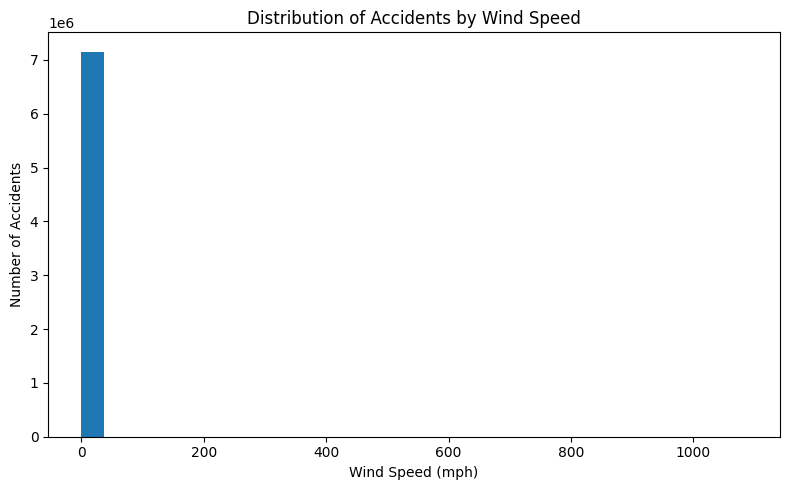

In [11]:
speed_idx = header_list.index("Wind_Speed(mph)")
speed_rdd = parsed_rdd.mapPartitions(get_column_processor(speed_idx))
bin_edges, bin_counts = speed_rdd.histogram(30)
width = bin_edges[1] - bin_edges[0]

plt.figure(figsize=(8, 5))
plt.bar(
    bin_edges[:-1],    
    bin_counts,        
    width=width,   
    align='edge'
)

plt.xlabel('Wind Speed (mph)')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Accidents by Wind Speed')
plt.tight_layout()
plt.show()

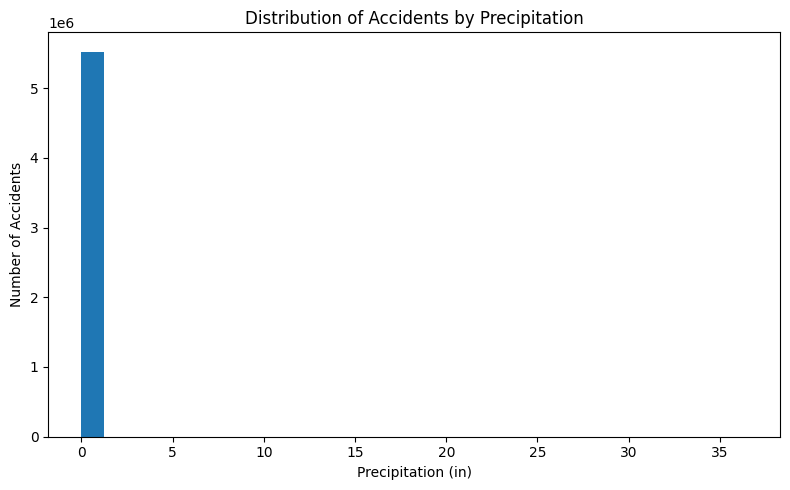

In [12]:
precip_idx = header_list.index("Precipitation(in)")
precip_rdd = parsed_rdd.mapPartitions(get_column_processor(precip_idx))
bin_edges, bin_counts = precip_rdd.histogram(30)
width = bin_edges[1] - bin_edges[0]

plt.figure(figsize=(8, 5))
plt.bar(
    bin_edges[:-1],    
    bin_counts,        
    width=width,   
    align='edge'
)

plt.xlabel('Precipitation (in)')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Accidents by Precipitation')
plt.tight_layout()
plt.show()

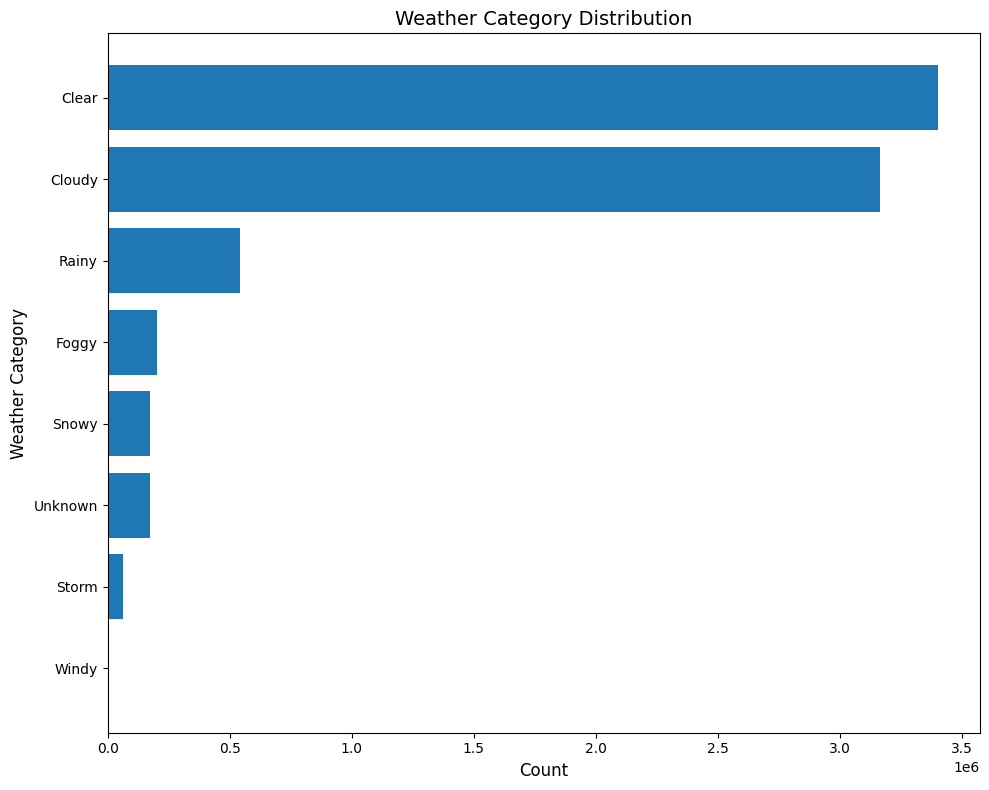

In [18]:
detailed_categories = {
    'Rainy': ['rain', 'rainy', 'drizzle', 'shower', 'raining', 'rainfall', 'precipitation'],
    'Cloudy': ['cloud', 'cloudy', 'overcast', 'mostly cloudy', 'partly cloudy'],
    'Clear': ['clear', 'sunny', 'fair'],
    'Snowy': ['snow', 'snowy', 'blizzard', 'sleet', 'ice', 'wintry', 'hail'],
    'Foggy': ['fog', 'foggy', 'mist', 'haze', 'smoke', 'dust', 'ash', 'sand'],
    'Windy': ['wind', 'windy', 'breezy'],
    'Storm': ['storm', 'thunder', 'lightning', 'squall', 'tornado']
}

header_list = header.split(",")
weather_idx = header_list.index("Weather_Condition")

def detailed_categorize_rdd(row):
    condition = row[weather_idx]
    
    if condition is None or condition == '':
        return 'Unknown'
    
    condition_lower = str(condition).lower()
    for category, keywords in detailed_categories.items():
        if any(keyword in condition_lower for keyword in keywords):
            return category
    return 'Other'

category_pairs = parsed_rdd.map(lambda row: (detailed_categorize_rdd(row), 1))
weather_counts_rdd = category_pairs.reduceByKey(lambda a, b: a + b)
final_results = weather_counts_rdd.collect()
final_results.sort(key=lambda x: x[1])

categories = [x[0] for x in final_results]
counts = [x[1] for x in final_results]
plt.figure(figsize=(10, 8))
plt.barh(categories, counts)
plt.title('Weather Category Distribution', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Weather Category', fontsize=12)
plt.tight_layout()
plt.show()

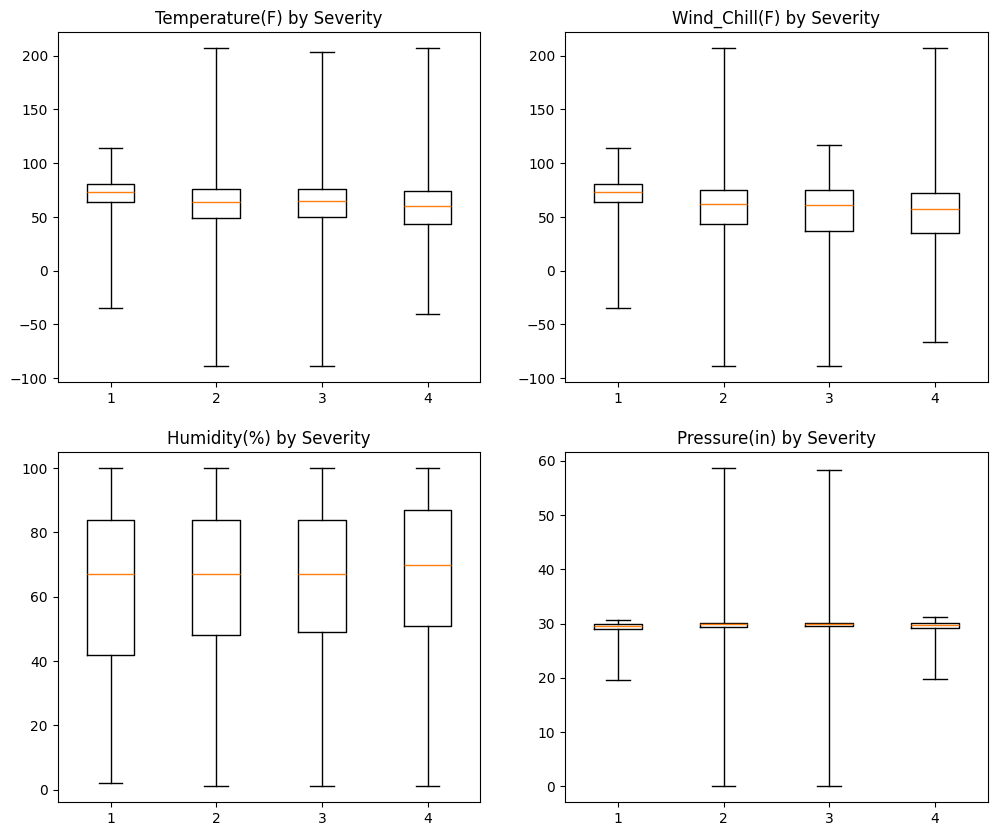

26/02/23 00:37:16 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 1541250 ms exceeds timeout 120000 ms
26/02/23 00:37:16 WARN SparkContext: Killing executors is not supported by current scheduler.
26/02/23 00:37:16 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:53)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:359)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:132)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$

In [18]:
severity_idx = header_list.index("Severity")

def get_severity_weather_pairs(var_name):
    var_idx = header_list.index(var_name)
    def process_partition(iterator):
        for row in iterator:
            try:
                sev = row[severity_idx]
                val = float(row[var_idx])
                yield (sev, val) # (Key, Value)
            except (ValueError, IndexError):
                continue
    return process_partition

weather_cols = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)']
plot_data = {}

for var in weather_cols:
    grouped_rdd = parsed_rdd.mapPartitions(get_severity_weather_pairs(var)).groupByKey()
    
    # Calculate the 5-number summary locally for each Severity
    stats_by_severity = {}
    for severity, values in grouped_rdd.collect():
        sorted_vals = sorted(list(values)) 
        if not sorted_vals: continue
        
        n = len(sorted_vals)
        stats_by_severity[severity] = {
            'min': sorted_vals[0],
            'q1': sorted_vals[int(n * 0.25)],
            'med': sorted_vals[int(n * 0.5)],
            'q3': sorted_vals[int(n * 0.75)],
            'max': sorted_vals[-1]
        }
    plot_data[var] = stats_by_severity

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for ax, var in zip(axes.flatten(), weather_cols):
    sev_levels = sorted(plot_data[var].keys())
    box_stats = [
        {
            "label": s, "whislo": plot_data[var][s]['min'], 
            "q1": plot_data[var][s]['q1'], "med": plot_data[var][s]['med'], 
            "q3": plot_data[var][s]['q3'], "whishi": plot_data[var][s]['max']
        } 
        for s in sev_levels
    ]
    ax.bxp(box_stats, showfliers=False)
    ax.set_title(f'{var} by Severity')

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Comparision with larger data") \
    .getOrCreate()
sc = spark.sparkContext
raw_rdd = sc.textFile("synthetic_eeg_data-v2.csv")
header = raw_rdd.first()
data_rdd = raw_rdd.filter(lambda line: line != header)
parsed_rdd = data_rdd.map(lambda line: line.split(","))

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
26/02/26 15:34:22 WARN Utils: Your hostname, lw-mac.local, resolves to a loopback address: 127.0.0.1; using 172.18.132.212 instead (on interface en0)
26/02/26 15:34:22 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
26/02/26 15:34:23 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


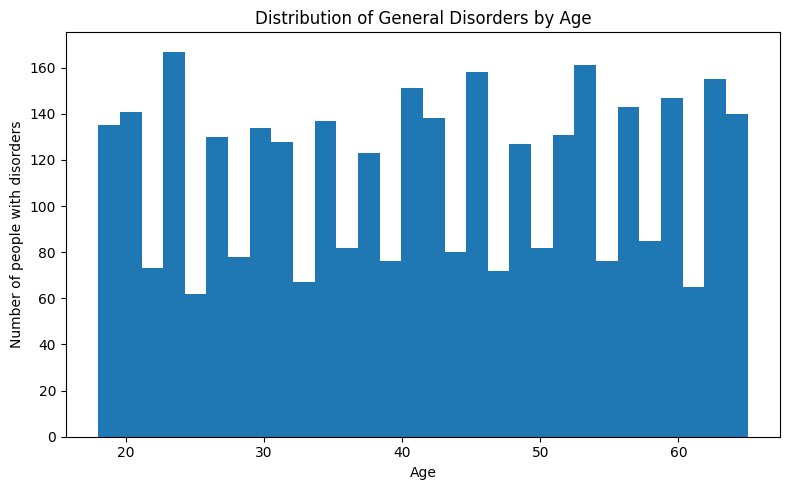

In [7]:
header_list = header.split(",")
age_idx = header_list.index("age")
age_rdd = parsed_rdd.mapPartitions(get_column_processor(age_idx))
bin_edges, bin_counts = age_rdd.histogram(30)
width = bin_edges[1] - bin_edges[0]

plt.figure(figsize=(8, 5))
plt.bar(
    bin_edges[:-1],    
    bin_counts,        
    width=width,   
    align='edge'
)

plt.xlabel('Age')
plt.ylabel('Number of people with disorders')
plt.title('Distribution of General Disorders by Age')
plt.tight_layout()
plt.show()